# Final project - M<sup>3</sup>

### 1. Introduction

The data that we are using is the [Breast Cancer Coimbra](https://archive.ics.uci.edu/dataset/451/breast+cancer+coimbra) dataset from the UCI Machine Learning Repository, donated on 3/5/2018. The dataset was obtained from the Gynaecology Department of the University Hospital Centre of Coimbra between 2009 and 2013. It has patient data on age, BMI, glucose, insulin, HOMA, heptin, adiponectin, resistin, and MCP.1. We selected this dataset as the data was all quantitative, and they separated the healthy and cancer patients.

***Aim***

Make machine learning models that can predict the incidence of breast cancer from patient data.

***Approach***

Three different models will be trained using this data and compared for their ability to predict breast cancer in these patients. The three selected models are XGBoost, Support Vector Machine (SVC), and Random Forest.

### 2. Data pre-processing

In [1]:
%matplotlib inline
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# XGBoost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

In [2]:
# fetch dataset 
breast_cancer_coimbra = fetch_ucirepo(id=451) 

# data (as pandas dataframes) 
X = breast_cancer_coimbra.data.features 

# 1 is healthy, 2 is cancer
y = breast_cancer_coimbra.data.targets

df = X.join(y)
df['Classification'] = df['Classification'].replace({1: 0, 2: 1})
df['Classification'] = df['Classification'].astype('category')

y = y.replace({1: 0, 2: 1})
y = y.to_numpy()
y = y.ravel()

df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,1
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,1
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,1
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,1


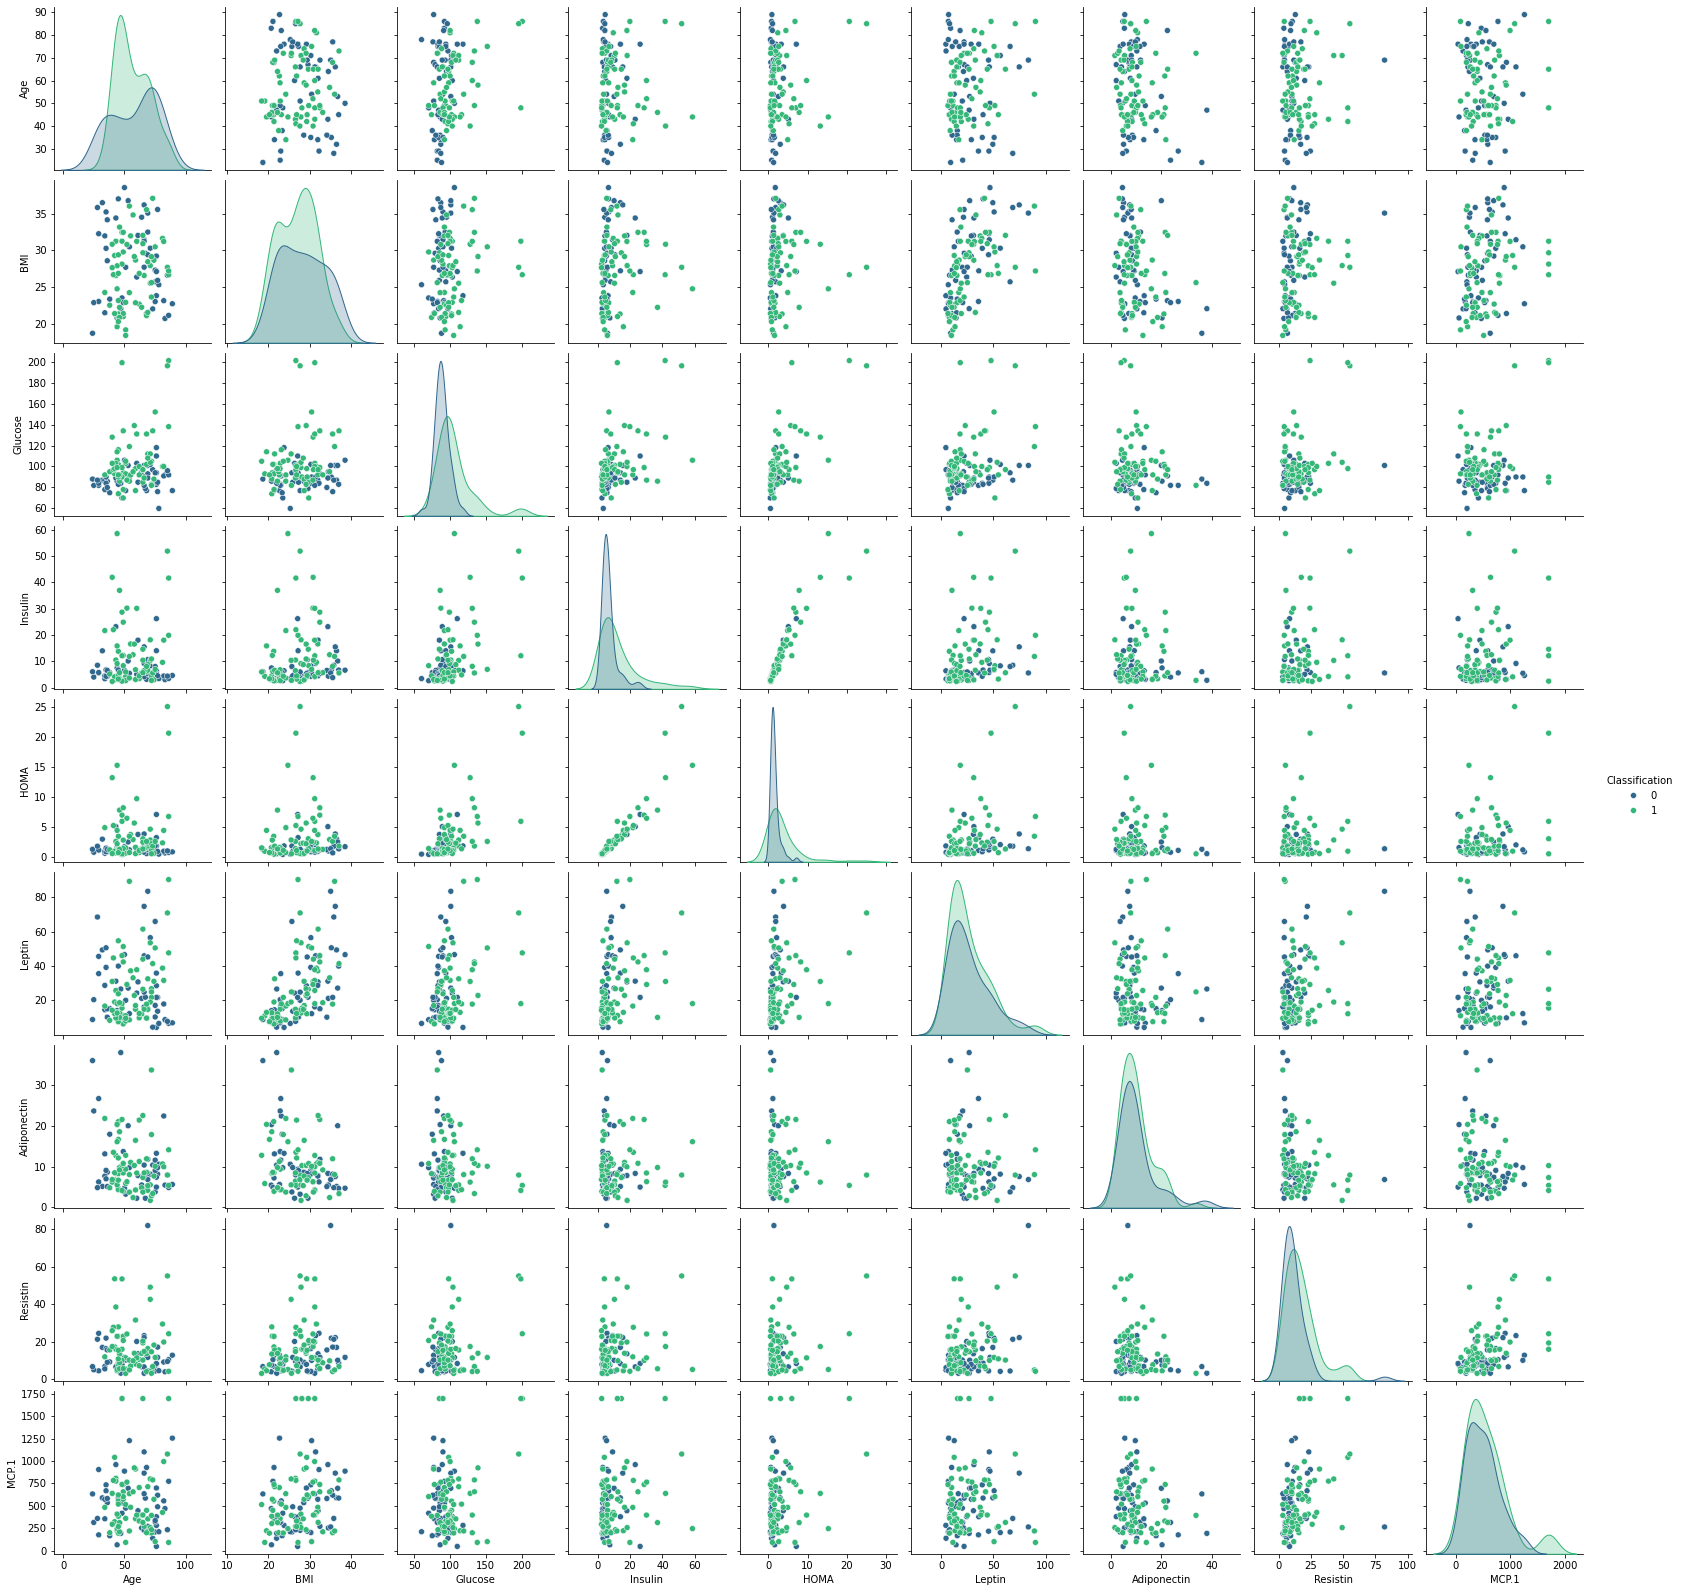

In [3]:
sns.pairplot(df, hue='Classification', palette = 'viridis')
plt.show()

### 3. Model setup - XGBoost (Emily)

We tried dropping some categories based on a [paper](https://semanticscholar.org/paper/Using-Resistin%2C-glucose%2C-age-and-BMI-to-predict-the-Patr%C3%ADcio-Pereira/0861bd9c3acf6504ce142517c4e05bf8f564f32a) that had better results from only using resistin, glucose, age, and BMI. To find an optimal model, we changed n_estimators, max_depth, and learning rate. The model below was the best one.

In [4]:
X = X.drop(columns=['Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'MCP.1'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

xgbModel = xgb.XGBClassifier(n_estimators = 50,
                             max_depth = 3,
                             learning_rate = 0.1)

xgbModel.fit(X_train, y_train)

xgbPredict = xgbModel.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, xgbPredict, squared=False)
print("RMSE:", rmse)

RMSE: 0.408248290463863


In [5]:
print(classification_report(y_test, xgbPredict))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.83      0.83      0.83        12

    accuracy                           0.83        24
   macro avg       0.83      0.83      0.83        24
weighted avg       0.83      0.83      0.83        24



However, for XGBoost, using all variables created a marginally better model.

In [6]:
X = breast_cancer_coimbra.data.features 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

xgbModel = xgb.XGBClassifier(n_estimators = 50,
                             max_depth = 3,
                             learning_rate = 0.1)

xgbModel.fit(X_train, y_train)

xgbPredict = xgbModel.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, xgbPredict, squared=False)
print("RMSE:", rmse)

print(classification_report(y_test, xgbPredict))

RMSE: 0.408248290463863
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.75      1.00      0.86        12

    accuracy                           0.83        24
   macro avg       0.88      0.83      0.83        24
weighted avg       0.88      0.83      0.83        24



### 3. Model setup - Support Vector Machine (Mack)

### 3. Model setup - Random Forest (Michele)

### 4. Results

### 5. Discussion